In [8]:
import cv2
import numpy as np

from moviepy.editor import VideoFileClip
# from scipy.misc import imresize

from matplotlib import pyplot
from matplotlib.pyplot import imshow, figure 
import imagehash

import IPython.display as display
from PIL import Image

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [24, 16]

In [17]:
sprites = []
def process(frame):
    frame = imresize(frame, size=(720, 1280), interp='nearest')
    crop = frame[115:608, 309:975]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,10,255,0)
    blur = cv2.GaussianBlur(thresh, (3, 3), 0)
    contours, hierarchy = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in enumerate(contours):       
        (x,y,w,h) = cv2.boundingRect(contour[1])
        if h < 10 or h > 415 or w < 5 or w > 145:
            continue
        x += 309
        y += 115
        #cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 255, 255), 2)
        sprite = Image.fromarray(frame[y:y+h, x:x+w])
        sprites.append(sprite)

    return frame

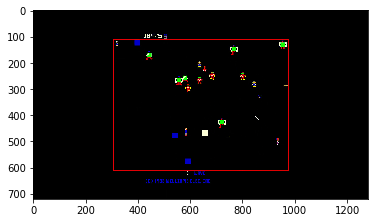

In [18]:
clip = VideoFileClip('/home/strider/Code/robotron/resources/video/robotron-1.mp4')
img = clip.get_frame(101.6)
imshow(process(img))

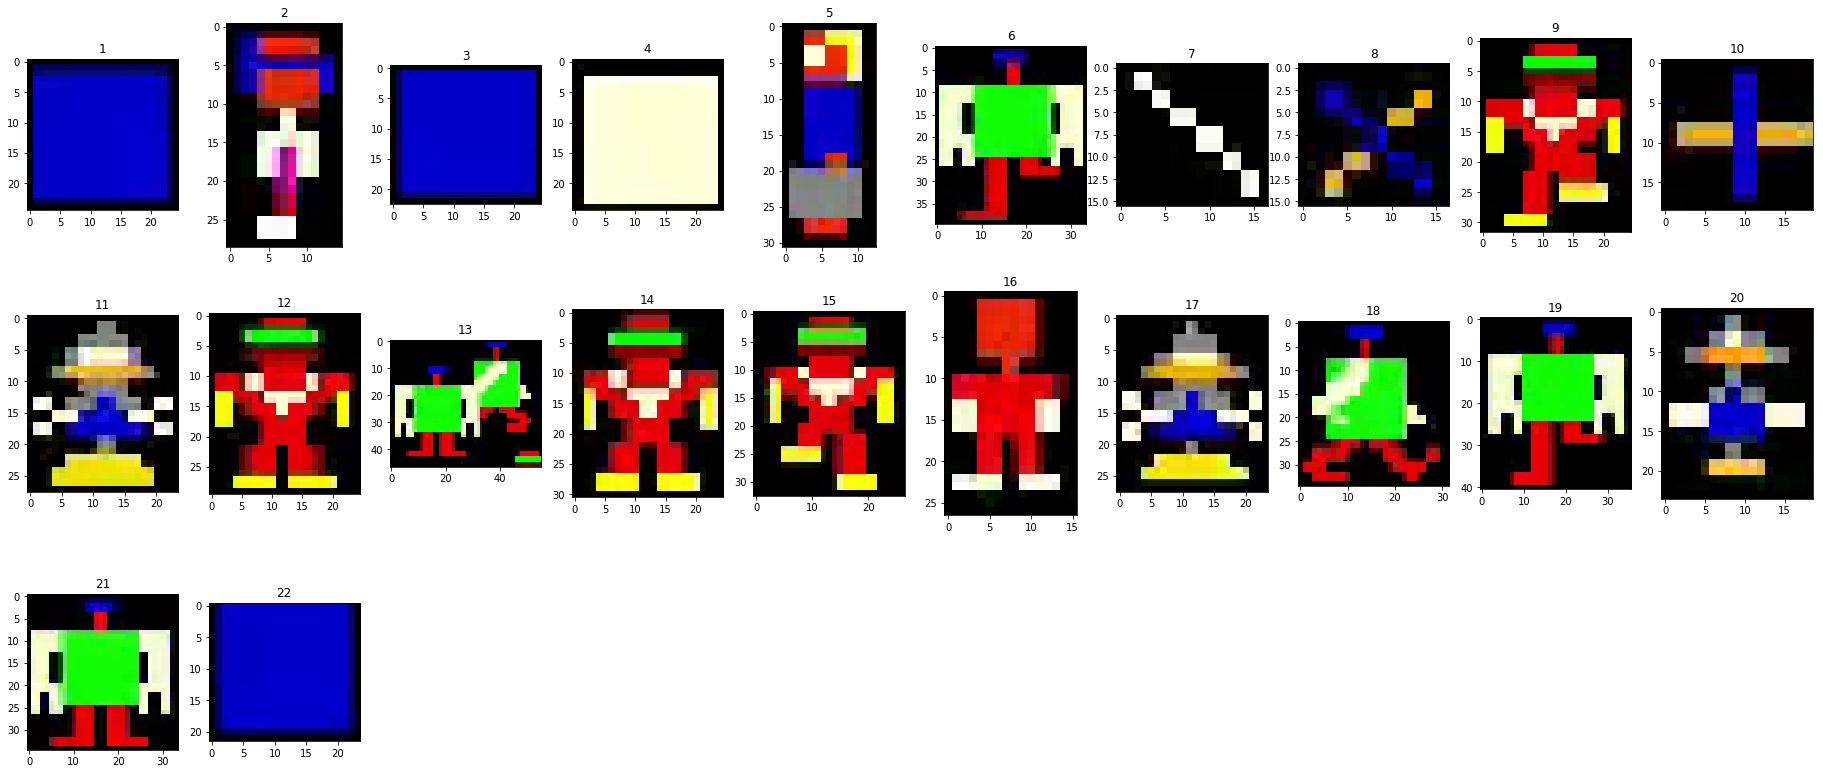

In [19]:
fig=pyplot.figure(figsize=(32, 14))
i = 0
r = 10
c = int(len(sprites) / 10) + 1

for sprite in sprites:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprite)
    subplot.set_title(i)

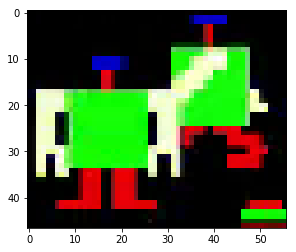

In [21]:
imshow(sprites[12])

In [47]:
double = np.array(sprites[12])
gray = cv2.cvtColor(double, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,10,255,0)
kernel = np.ones((8,8),np.uint8)
erosion = cv2.erode(thresh, kernel, iterations = 1)
contours, _ = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
subsprites = []
for contour in enumerate(contours):       
    (x,y,w,h) = cv2.boundingRect(contour[1])
    if h < 10 or h > 415 or w < 5 or w > 145:
        continue
    sprite = Image.fromarray(double[y-10:y+h+10, x-10:x+w+10])
    subsprites.append(sprite)

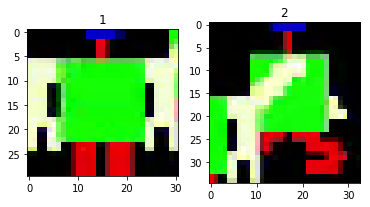

In [48]:
fig=pyplot.figure(figsize=(32, 14))
i = 0
r = 10
c = int(len(sprites) / 10) + 1

for sprite in subsprites:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprite)
    subplot.set_title(i)

In [21]:
import numpy as np
from scipy.spatial import distance as dist

a = np.array([[1,1], [10, 10], [40, 40]])
b = np.array([[2,1], [13, 13], [40, 40], [60,50]])

distances = dist.cdist(a, b)
print(distances)

oldSpriteArgs = distances.min(axis=1).argsort()
newSortedSpriteArgs = distances.argsort(axis=1)

for oldSpriteArg in oldSpriteArgs:
    for newSpriteArg in newSortedSpriteArgs[oldSpriteArg]:
        sdist = distances[oldSpriteArg][newSpriteArg]
        print(oldSpriteArg, newSpriteArg, sdist)

[[ 1.         16.97056275 55.15432893 76.69419796]
 [12.04159458  4.24264069 42.42640687 64.03124237]
 [54.45181356 38.18376618  0.         22.36067977]]
2 2 0.0
2 3 22.360679774997898
2 1 38.18376618407357
2 0 54.45181356024793
0 0 1.0
0 1 16.97056274847714
0 2 55.154328932550705
0 3 76.69419795525604
1 1 4.242640687119285
1 0 12.041594578792296
1 2 42.42640687119285
1 3 64.03124237432849


In [23]:
a = set()
a.add(2)
a.add(3)
aa = set(range(0, distances.shape[0])).difference(a)
aa

{0, 1}

In [1]:
def isBetween(a, b, c):
    (ax, ay), (bx, by), (cx, cy) = a, b, c
    crossproduct = (cy - ay) * (bx - ax) - (cx - ax) * (by - ay)

    # compare versus epsilon for floating point values, or != 0 if using integers
    if abs(crossproduct) > self.EPSILON:
        return False

    dotproduct = (cx - ax) * (bx - ax) + (cy - ay)*(by - ay)
    if dotproduct < 0:
        return False

    squaredlengthba = (bx - ax)*(bx - ax) + (by - ay)*(by - ay)
    if dotproduct > squaredlengthba:
        return False

    return True

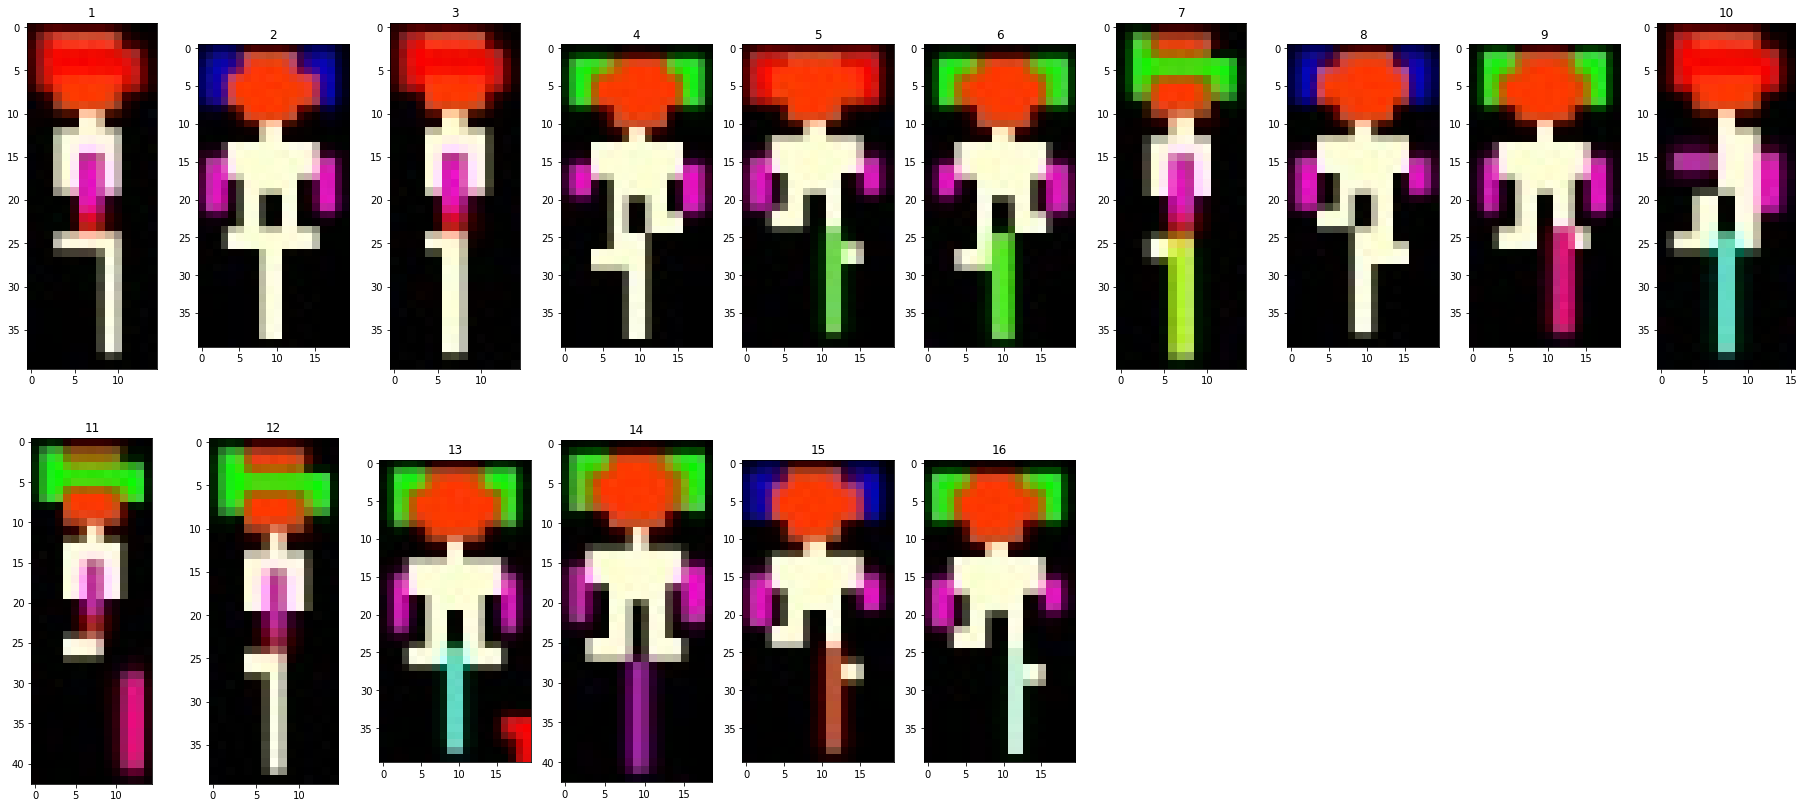

In [36]:
import glob
imgs = []
for f in glob.glob('/home/strider/Code/robotron/scratch/Player/*'):
    img = cv2.imread(f)
    imgs.append(img)
    
fig=pyplot.figure(figsize=(32, 14))
i = 0
r = 10
c = int(len(imgs) / 10) + 1

for sprite in imgs:
    i += 1
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprite[:,:, [2,1,0]])
    subplot.set_title(i)    


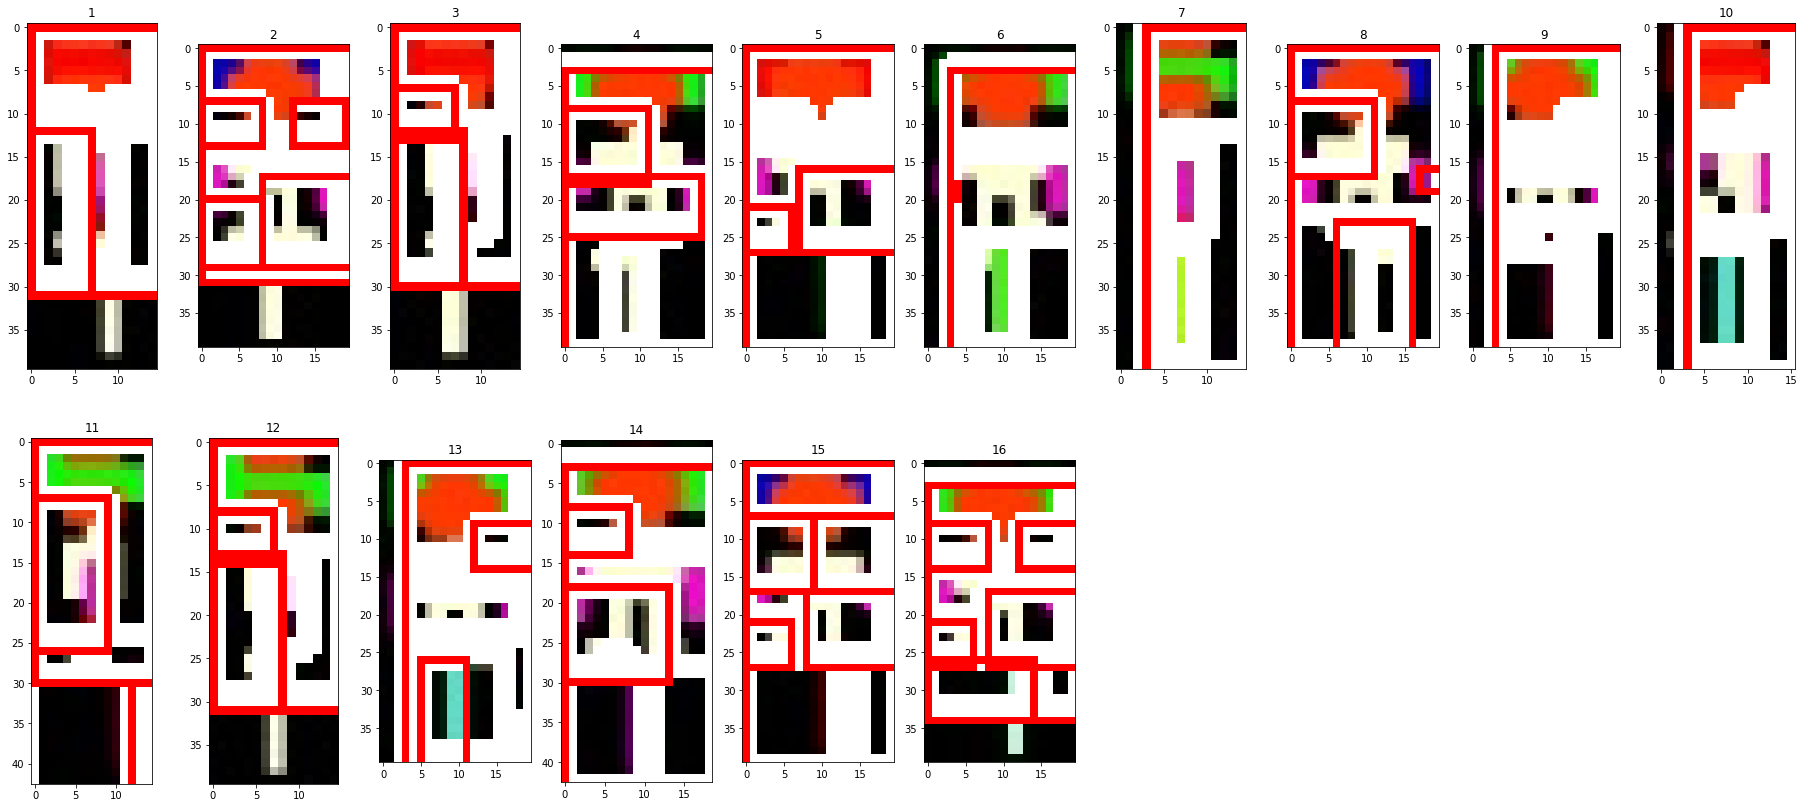

In [63]:
fig=pyplot.figure(figsize=(32, 14))
i = 0
r = 10
c = int(len(imgs) / 10) + 1

for sprite in imgs:
    i += 1
    gray = cv2.cvtColor(sprite, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray,10,255,0)
    kernel = np.ones((4,4),np.uint8)
    erosion = cv2.erode(thresh, kernel, iterations = 1)
    contours, _ = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in enumerate(contours):       
        (x,y,w,h) = cv2.boundingRect(contour[1])
        cv2.rectangle(sprite, (x, y), (x+w, y+h), (0, 0, 255), 1)

    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprite[:,:, [2,1,0]])
    subplot.set_title(i)   

(34, 5, 3)
(0, 10, 3)


ValueError: zero-size array to reduction operation minimum which has no identity

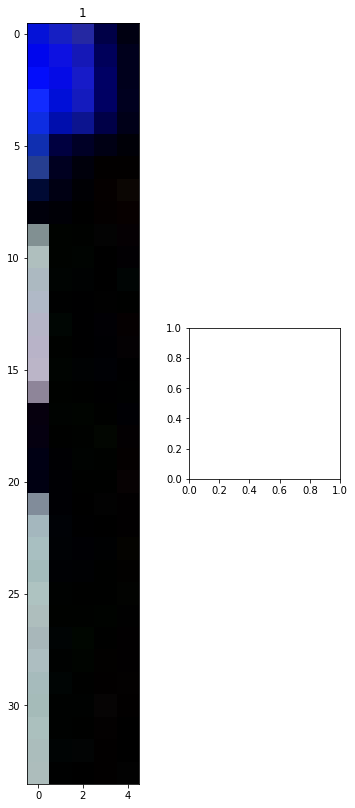

In [58]:
fig=pyplot.figure(figsize=(32, 14))
i = 0
r = 10
c = int(len(subsprites) / 10) + 1

for sprite in subsprites:
    i += 1
    print(sprite.shape)
    subplot = fig.add_subplot(c, r, i)
    pyplot.imshow(sprite)
    subplot.set_title(i)    